<a href="https://colab.research.google.com/github/robinacharya/Ensemble-Machine-Learning-Algorithms-for-Real-World-Data-RWD-/blob/Decision-Tree/Decision_Tree_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, auc, cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve

import pandas as pd
from google.colab import drive

In [2]:
# Load the dataset
# Assuming 'df' is the DataFrame containing the dataset
# Replace 'your_dataset.csv' with the actual file path or URL
# df = pd.read_csv('your_dataset.csv')

# Display the first few rows of the dataset
# df.head()


In [3]:
# Load the dataset
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset from Google Drive
path_to_dataset = "/content/drive/MyDrive/german_credit_data.csv"
df = pd.read_csv(path_to_dataset)

In [5]:
# Data Preprocessing
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [6]:
# Data Preprocessing
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['number']).columns

In [7]:
# Data Preprocessing
# Impute missing values in categorical columns with the most frequent value
for col in categorical_cols:
    if missing_values[col] > 0:
        imputer = SimpleImputer(strategy='most_frequent')
        # Reshape the output of fit_transform to be a 1D array
        df[col] = imputer.fit_transform(df[[col]]).ravel()

In [8]:
# Data Preprocessing
# Impute missing values in numeric columns with the mean
for col in numeric_cols:
    if missing_values[col] > 0:
        imputer = SimpleImputer(strategy='median')
        df[col] = imputer.fit_transform(df[[col]])

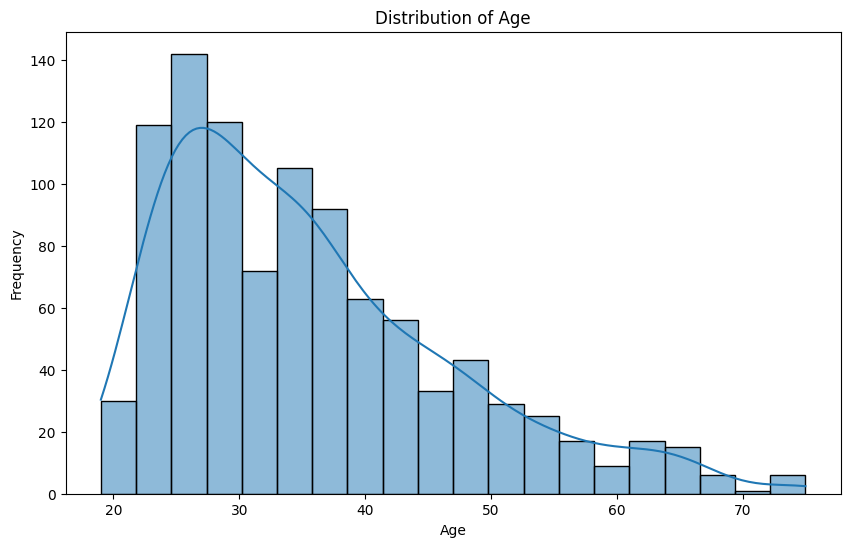

In [9]:
# Exploratory Data Analysis (EDA)

# Plot 1: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

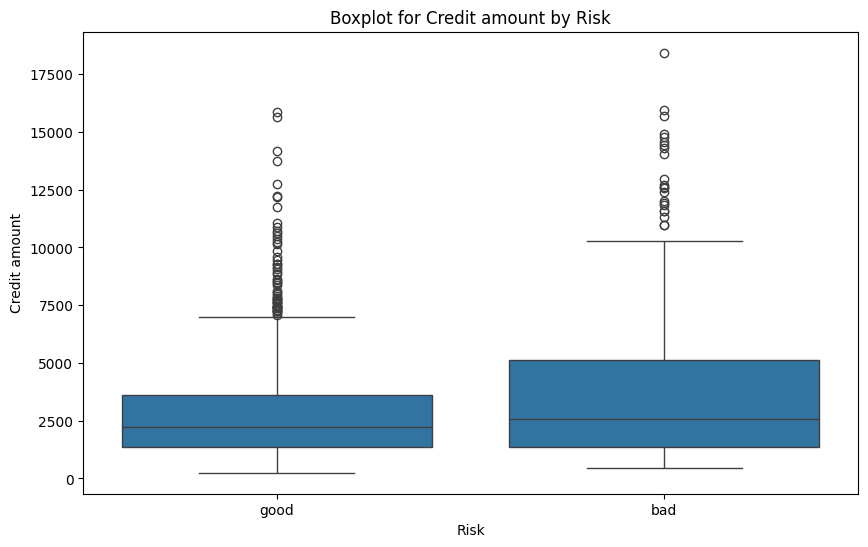

In [10]:
# Plot 2: Boxplot for Credit amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk', y='Credit amount', data=df)
plt.title('Boxplot for Credit amount by Risk')
plt.show()


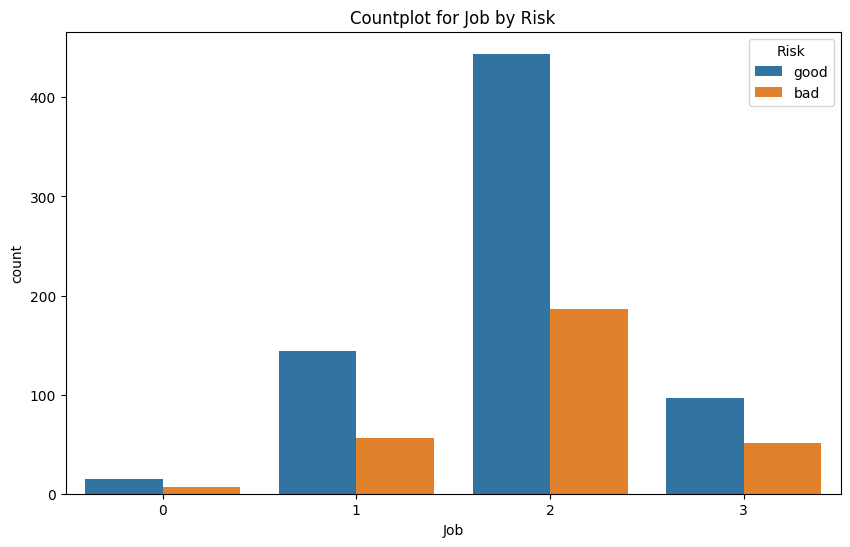

In [11]:
# Plot 3: Countplot for Job
plt.figure(figsize=(10, 6))
sns.countplot(x='Job', hue='Risk', data=df)
plt.title('Countplot for Job by Risk')
plt.show()

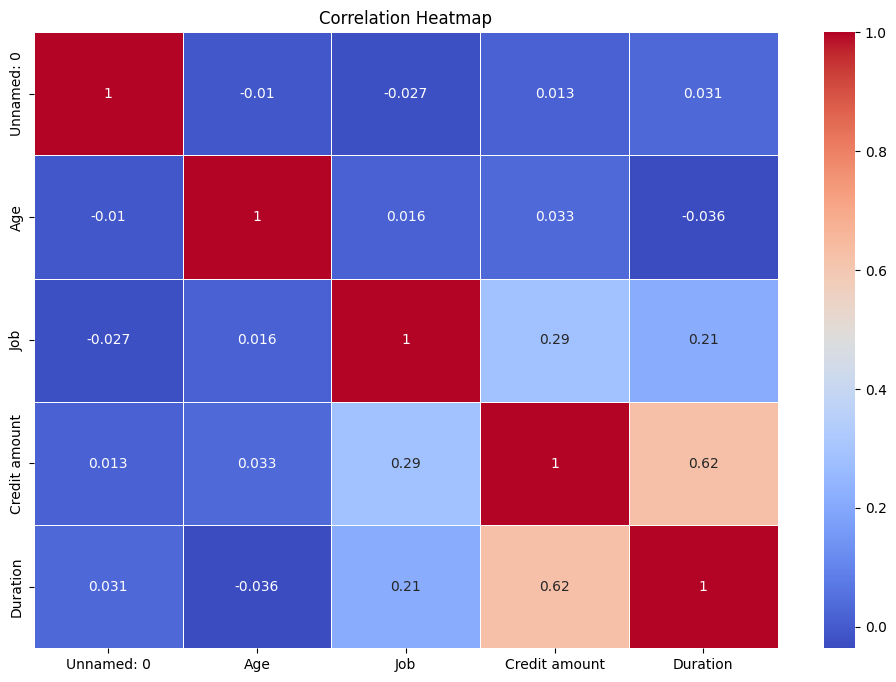

In [12]:
# Plot 4: Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

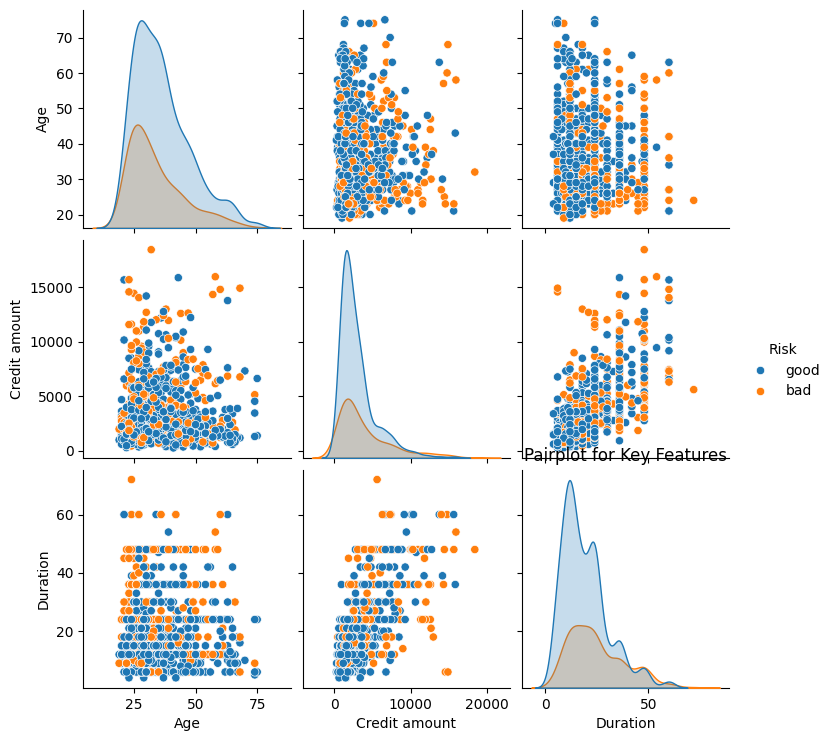

In [13]:
# Plot 5: Pairplot for key features
sns.pairplot(df[['Age', 'Credit amount', 'Duration', 'Risk']], hue='Risk')
plt.title('Pairplot for Key Features')
plt.show()

In [14]:
# Data Preprocessing

# Assuming 'Risk' is the target variable
# Drop any rows with missing values for simplicity
df = df.dropna()

In [15]:
# Assuming 'Risk' is the target variable
X = df.drop('Risk', axis=1)
y = df['Risk']

In [16]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)


In [17]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
# Decision Tree Model

# Create Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

In [20]:
# Fit the classifier to the training data
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [21]:
# Predictions on the testing set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [22]:
# Precision, Recall, Confusion Matrix
precision = precision_score(y_test, y_pred, pos_label='good')  # Assuming 'good' is the positive class
recall = recall_score(y_test, y_pred, pos_label='good')  # Assuming 'good' is the positive class
conf_matrix = confusion_matrix(y_test, y_pred, labels=['bad', 'good'])

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')


Precision: 0.74
Recall: 0.70
Confusion Matrix:
[[25 34]
 [42 99]]


In [23]:
# F1 Score
f1 = f1_score(y_test, y_pred, pos_label='good')  # Assuming 'good' is the positive class

# Print the result
print(f'F1 Score: {f1:.2f}')


F1 Score: 0.72


In [24]:
# AUC-ROC
# Convert categorical labels to binary labels
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

y_test_binary = LabelEncoder().fit_transform(y_test)

# AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr, tpr)

# Print the AUC-ROC score
print(f'AUC-ROC Score: {roc_auc:.2f}')


AUC-ROC Score: 0.56


In [25]:
# Print evaluation metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Precision: 0.74
Recall: 0.70
F1-score: 0.72
Confusion Matrix:
[[25 34]
 [42 99]]
ROC AUC Score: 0.56


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Assuming label encoding has been done using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Generate predictions on the training data
train_pred = model.predict(X_train)  # Predict using your fitted model

train_pred_encoded = label_encoder.transform(train_pred)

# Training set performance
train_precision = precision_score(y_train_encoded, train_pred_encoded)
train_recall = recall_score(y_train_encoded, train_pred_encoded)
train_f1 = f1_score(y_train_encoded, train_pred_encoded)
train_roc_auc = roc_auc_score(y_train_encoded, model.predict_proba(X_train)[:, 1])



In [27]:
# Testing set performance

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming label encoding has been done using LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Testing set performance
test_precision = precision_score(y_test_encoded, y_pred_encoded)
test_recall = recall_score(y_test_encoded, y_pred_encoded)
test_f1 = f1_score(y_test_encoded, y_pred_encoded)

# test_precision = precision_score(y_test, y_pred)
# test_recall = recall_score(y_test, y_pred)
# test_f1 = f1_score(y_test, y_pred)

In [28]:
# Print evaluation metrics
print("\nTesting Set Metrics:")
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC AUC Score: {roc_auc:.2f}')


Testing Set Metrics:
Precision: 0.74
Recall: 0.70
F1-score: 0.72
Confusion Matrix:
[[25 34]
 [42 99]]
ROC AUC Score: 0.56


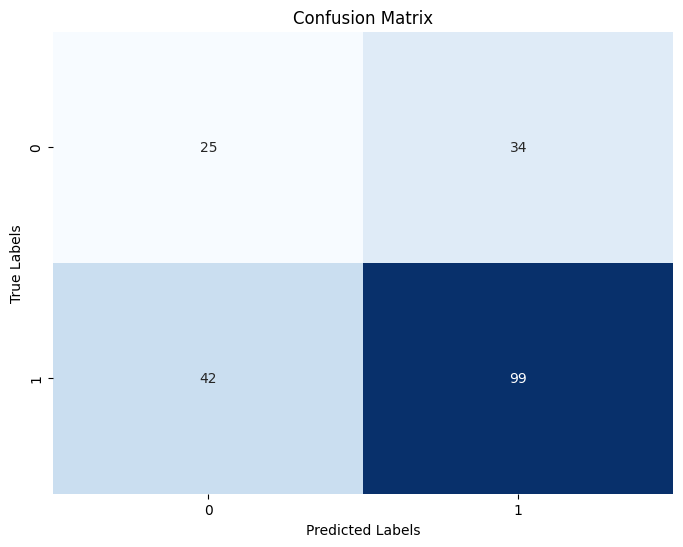

In [29]:
# Decision Tree Model Evaluation Metrics

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

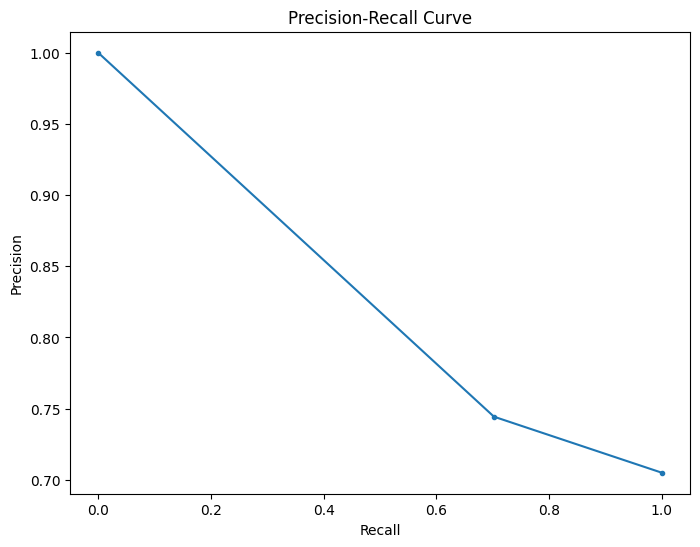

In [30]:
# Precision-Recall Curve

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve

# Assuming label encoding has been done using LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test_encoded, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


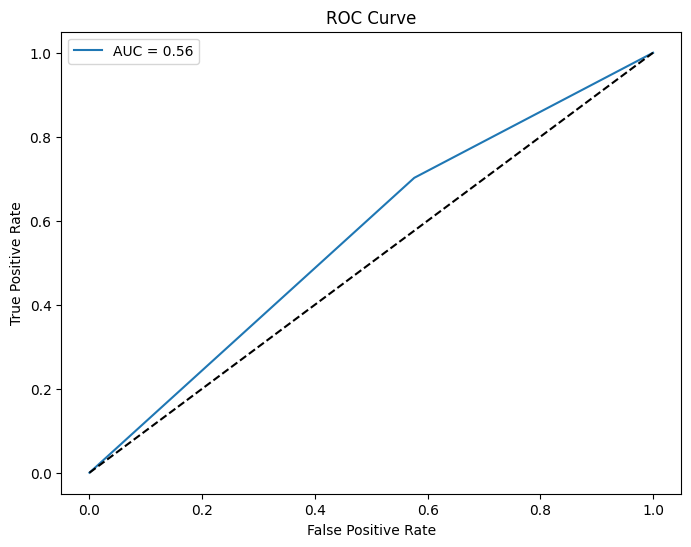

In [31]:
# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

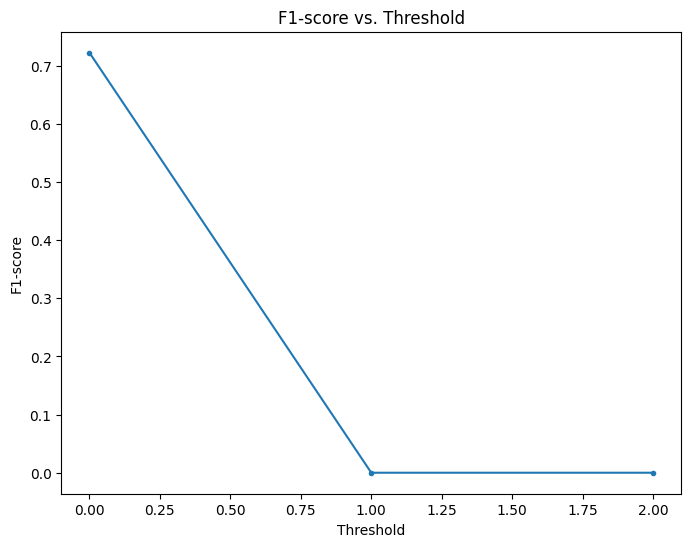

In [32]:
# F1-score Plot
from sklearn.metrics import f1_score

# Assuming label encoding has been done using LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# F1-score Plot
f1_values = [f1_score(y_test_encoded, (y_prob > threshold).astype(int)) for threshold in thresholds]
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_values, marker='.')
plt.title('F1-score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.show()


In [33]:
# Print bias-variance metrics
print("\nTraining Set Metrics:")
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1-score: {train_f1:.2f}')
print(f'Training ROC AUC Score: {train_roc_auc:.2f}')

print("\nTesting Set Metrics:")
print(f'Testing Precision: {test_precision:.2f}')
print(f'Testing Recall: {test_recall:.2f}')
print(f'Testing F1-score: {test_f1:.2f}')


Training Set Metrics:
Training Precision: 1.00
Training Recall: 1.00
Training F1-score: 1.00
Training ROC AUC Score: 1.00

Testing Set Metrics:
Testing Precision: 0.74
Testing Recall: 0.70
Testing F1-score: 0.72


In [34]:
# HYPERPARAMETER TUNED DECISION TREE MODEL
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
# Adding hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'], # only these 2 are available in scikit-learn
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 50, 100, 200],
    'min_samples_split': [2, 5, 10, 20, 30 ,40],
    'min_samples_leaf': [1, 2, 4, 8 ,16, 32, 64]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_

# Printing the best parameters found by GridSearchCV
print("Best Parameters Found by GridSearchCV:\n", grid_search.best_params_)

# Training with the best hyperparameters
best_dt.fit(X_train, y_train)

# Evaluating the tuned model
y_pred_tuned = best_dt.predict(X_test)

print("Tuned Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))


Fitting 3 folds for each of 1176 candidates, totalling 3528 fits
Best Parameters Found by GridSearchCV:
 {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 64, 'min_samples_split': 2, 'splitter': 'random'}
Tuned Model Performance
Accuracy: 0.705
Confusion Matrix:
 [[  0  59]
 [  0 141]]
Classification Report:
               precision    recall  f1-score   support

         bad       0.00      0.00      0.00        59
        good       0.70      1.00      0.83       141

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
y_prob_tuned = best_dt.predict_proba(X_test)[:, 1]

In [36]:
# AUC-ROC
# Convert categorical labels to binary labels
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

y_test_binary = LabelEncoder().fit_transform(y_test)

# AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_tuned)
roc_auc = auc(fpr, tpr)

# Print the AUC-ROC score
print(f'AUC-ROC Score: {roc_auc:.2f}')


AUC-ROC Score: 0.51


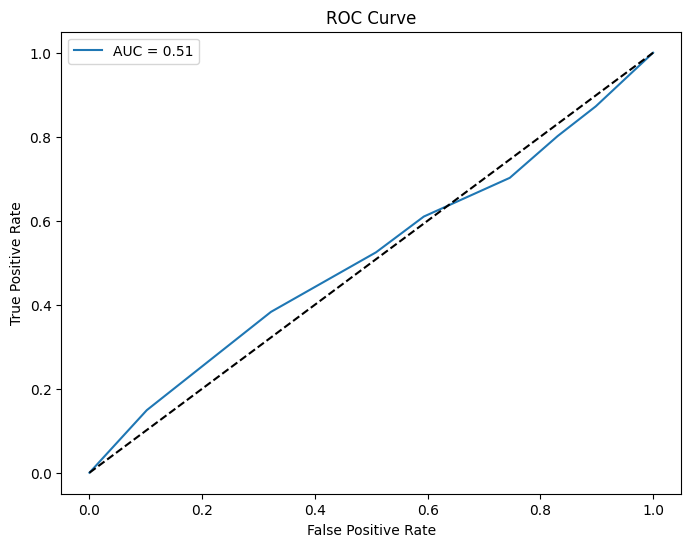

In [37]:
# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Learner Activity:

Implement a decision tree model with relevant EDA and comprehensive performance metrics plot relevant to classification using the dataset provided to you. Include hyperparameter tuning.

The dataset provided is a comprehensive Mututal Funds dataset containing information for multiple schemes. Build a decision tree model to predict the 'risk level' of a scheme and report all relevant classification performance metrics.